<div>
<img src=https://github.com/jflores31297/Portfolio_Theory_with_Python/blob/main/Project%20Cover%20Image.png?raw=true width="900">
</div>

---
### Building an Optimal Investment Portfolio Using Modern Portfolio Theory
Investment portfolio management is a cornerstone of modern finance, enabling individuals and institutions to allocate assets effectively to maximize returns while minimizing risk. This project, “Portfolio Optimization with Python,” leverages advanced computational tools and Modern Portfolio Theory (MPT) to analyze and construct optimal portfolios. By integrating Python’s powerful libraries and the principles of MPT, this program provides a robust framework for investors to make data-driven decisions.

The program begins by gathering historical market data using the yfinance library, focusing on key assets such as Fidelity ZERO International Index Fund (FZILX), Fidelity ZERO Total Market Index Fund (FZROX), and Fidelity U.S. Bond Index Fund (FXNAX). Through this data, the program calculates critical financial metrics, including daily returns, expected annual returns, and an annualized covariance matrix, to quantify asset performance and interdependencies.

Central to the analysis is the implementation of Monte Carlo simulations, which generate 5,000 random portfolio configurations to explore the risk-return spectrum. Each portfolio is evaluated using key metrics such as expected return, standard deviation (risk), and the Sharpe ratio—a measure of risk-adjusted performance. The program identifies two critical portfolios: one with the maximum Sharpe ratio, representing the best risk-adjusted return, and another with the minimum volatility, ideal for risk-averse investors.

Beyond portfolio optimization, the project incorporates the Capital Market Line (CAL) to illustrate the trade-off between risk and return for portfolios combining a risk-free asset with the optimal risky portfolio. It calculates the investor’s optimal allocation between these assets based on their risk tolerance, maximizing utility by balancing potential returns with risk aversion.

Visualization is a key feature of the program, providing intuitive plots to guide investment decisions. The scatter plot of the opportunity set highlights the efficient frontier, while the CAL and utility indifference curves visually demonstrate the optimal portfolio’s placement in the risk-return landscape.

This project exemplifies the application of Python in financial analytics, offering a comprehensive tool for portfolio optimization. It not only underscores the principles of diversification and risk management but also demonstrates the power of programming in transforming complex financial theories into actionable insights. Whether for academic, personal, or professional purposes, this program serves as a valuable resource for investors aiming to achieve their financial goals through informed, data-driven strategies.

---
# Import Required libraries
This section of the code imports the necessary libraries for constructing and analyzing the optimal investment portfolio using Modern Portfolio Theory (MPT).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import yfinance as yf

**Here’s a breakdown of each library and its purpose:**
1. pandas:
    - Used for data manipulation and analysis, especially when working with tabular data like stock prices and returns.
    - Helps in organizing financial data into dataframes for easy processing.
2. seaborn:
    - A statistical data visualization library built on top of Matplotlib.
    - Useful for creating visually appealing plots, such as heatmaps for correlations or other data visualizations.
3. matplotlib.pyplot:
    - A comprehensive library for creating static, interactive, and animated visualizations in Python.
	- Specifically used here for plotting results like the efficient frontier or other visual outputs of the portfolio analysis.
4. numpy:
	- A powerful library for numerical computations.
	- Used here for handling large arrays of numbers, such as returns, risk calculations, and optimizations.
5. scipy.optimize:
	-	A submodule of the SciPy library focused on optimization algorithms.
	-	Crucial for solving the mathematical optimization problems that arise in portfolio theory, such as minimizing risk for a given return.
6. yfinance:
	-	A Python library for accessing financial data from Yahoo Finance.
	-	Used to download historical stock prices and other market data required for the analysis.

---
#

---
# Gather Historical Data
This section prepares the financial data for analysis. It uses the yfinance library to download historical price data for selected ETFs (or stocks) over the last year. The data is then transformed into a tabular format with Date, Ticker, and corresponding financial metrics (e.g., Adjusted Close prices) as columns. This step ensures that the data is clean and structured for subsequent calculations, such as daily returns or portfolio optimization.

In [2]:
# List of stock tickers to download
tickers = ['FZILX', 'FZROX', 'FXNAX']

# Download data for the given tickers for the period of 1 year
data = yf.download(tickers, period='1y', progress=False, group_by='ticker')

# Reset index to bring Date into the columns
etf_data = data.stack(level=0, future_stack=True).reset_index()

# Display data
etf_data.head()  

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2024-01-22,FZROX,16.672844,16.672844,16.672844,16.672844,0
1,2024-01-22,FZILX,10.475581,10.475581,10.475581,10.475581,0
2,2024-01-22,FXNAX,9.957602,9.957602,9.957602,9.957602,0
3,2024-01-23,FZROX,16.702509,16.702509,16.702509,16.702509,0
4,2024-01-23,FZILX,10.485299,10.485299,10.485299,10.485299,0


**Code Breakdown:**
1. `tickers = ['FZILX', 'FZROX', 'FXNAX']`
    - A list of ticker symbols representing the assets to include in the portfolio.
    	- FZILX: Fidelity ZERO International Index Fund.
    	- FZROX: Fidelity ZERO Total Market Index Fund.
    	- FXNAX: Fidelity U.S. Bond Index Fund.
2. `yf.download(tickers, period='1y', progress=False, group_by='ticker')`
	- This line downloads historical data for the specified tickers for the past 1 year.
	- Parameters:
    	- `period='1y'`: Specifies the time frame (1 year of data).
    	- `progress=False`: Disables the download progress bar for cleaner output.
    	- `group_by='ticker'`: Organizes the data by each ticker symbol for easier processing.
3. `etf_data = data.stack(level=0, future_stack=True).reset_index()`
	-	`data.stack(level=0)`: Converts the multi-level columns (ticker symbols) into a row-wise structure for easier analysis.
	-	`future_stack=True`: Ensures compatibility with future versions of Pandas.
	-	`reset_index()`: Resets the index to bring the Date into the columns for better accessibility and visualization.
4. `etf_data.head()`
	-	Displays the first five rows of the processed dataset to ensure that the data is correctly formatted and ready for further analysis.

---
# 

---
# Calculate Periodic (Daily) Return for each Ticker
This section focuses on calculating the daily returns for each asset in the portfolio. By using percentage changes in closing prices, we measure the relative performance of each ETF on a daily basis. The pivot table reorganizes the data, allowing us to analyze the returns as a time series for each asset. This is a crucial step for portfolio optimization, as daily returns are used to compute key metrics like expected returns, variance, and covariance.

In [3]:
etf_data['Daily Return'] = etf_data.groupby('Ticker')['Close'].pct_change()
daily_returns = etf_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
daily_returns

Ticker,FXNAX,FZILX,FZROX
Date,,,
2024-01-23,-0.001942,0.000928,0.001779
2024-01-24,-0.002918,0.007414,0.000000
2024-01-25,0.003902,0.001840,0.005329
2024-01-26,-0.000972,0.003673,-0.000589
2024-01-29,0.004864,0.004575,0.008839
...,...,...,...
2025-01-14,0.000000,0.006267,0.002472
2025-01-15,0.008920,0.011566,0.018245
2025-01-16,0.001965,0.004398,-0.000969


**Code Breakdown:**
1. `etf_data['Daily Return'] = etf_data.groupby('Ticker')['Close'].pct_change()`
    - Purpose: Computes the daily percentage change in the Close prices for each ETF.
	-	How It Works:
	-	The `groupby('Ticker')` groups the data by each ticker symbol so that calculations are performed independently for each asset.
	-	`pct_change()` computes the percentage change between consecutive rows (i.e., (current_close - previous_close) / previous_close).
	-	This results in a new column, `Daily Return`, that contains the daily rate of return for each ETF.
2. `daily_returns = etf_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')`
	-	Purpose: Transforms the etf_data table into a matrix-like structure where:
    	-	Rows (index): Represent the dates.
    	-	Columns (columns): Represent the individual ticker symbols.
    	-	Values (values): Represent the daily returns for each ticker on a given date.
	-	Why This is Important: A pivot table format is ideal for portfolio-level calculations, as it allows for matrix operations (e.g., covariance calculations, portfolio returns, etc.).
3. `daily_returns`
	-	Displays the resulting dataframe, which contains the daily returns for each ETF in a clean and structured format.

---
# 

---
# Calculate Annualized Expected Returns
This section calculates the expected annualized returns for each asset in the portfolio. By leveraging daily returns, it projects the potential yearly growth of each ETF, assuming compounding and consistent performance. These annualized returns serve as the foundational input for portfolio optimization, where the goal is to balance returns with risk.


In [4]:
mean_returns = ((1 + daily_returns.mean())**252) -1
mean_returns

Ticker
FXNAX    0.029126
FZILX    0.122489
FZROX    0.274673
dtype: float64

**Code Breakdown**
1. `daily_returns.mean()`
	-	Purpose: Calculates the average daily return for each ETF.
	-	This provides the mean return over the time period covered in the dataset for each asset.
	-	The result is a single value for each ticker, representing its daily average return.
2. `(1 + daily_returns.mean())`
	-	Purpose: Converts the daily return values into daily growth factors.
	-	For example, if the average daily return is 0.001 (0.1%), the daily growth factor becomes 1.001.
3. `((1 + daily_returns.mean())**252)`
	-	Purpose: Annualizes the growth factor by raising it to the power of 252.
	-	Why 252? There are approximately 252 trading days in a year, so this extrapolates the daily growth to an annual timeframe.
	-	This step assumes that daily returns compound over time.
4. `- 1`
	-	Purpose: Converts the annualized growth factor back into a percentage return by subtracting 1.
	-	For example, an annualized growth factor of 1.15 becomes a return of 0.15 (15%).
5. `mean_returns`
	-	Stores the annualized mean returns for each ETF as a Series.
	-	Each value represents the expected yearly return for the corresponding asset, based on historical daily performance.

---
# 

---
# Calculate Annualized Covariance Matrix
This step calculates the annualized covariance matrix, which quantifies the relationships between the returns of the assets in the portfolio. The covariance values are critical for estimating portfolio risk, as they help measure the extent to which assets move in tandem. By incorporating annualization, the matrix reflects the long-term relationships between assets, providing the foundation for calculating portfolio variance and identifying diversification opportunities.

In [5]:
cov_matrix = np.cov(daily_returns, rowvar=False) * (252)

cov_matrix

array([[0.00302255, 0.00191252, 0.00103896],
       [0.00191252, 0.01520214, 0.01196937],
       [0.00103896, 0.01196937, 0.01737783]])

**Code Breakdown**
1. `np.cov(daily_returns, rowvar=False)`
	-	Purpose: Calculates the covariance matrix of the daily returns for the assets.
	-	Covariance Matrix:
    	-	A mathematical representation of how two or more assets move in relation to one another.
    	-	Each element in the matrix represents the covariance between two assets (or an asset with itself, which is the variance).
	-	`rowvar=False`: Specifies that each column represents a variable (in this case, an asset) and rows represent observations (in this case, daily returns).
2. `* 252`
	-	Purpose: Annualizes the covariance values.
	-	Why? Since the covariance is based on daily returns, multiplying by 252 adjusts the values to reflect the yearly relationship between the assets.
	-	This is consistent with the assumption of 252 trading days per year.
3. `cov_matrix`
	-	Stores the resulting annualized covariance matrix.

---
# 

---
# Define Function to Calculate Portfolio Expected Return and Standard Deviation 
This function is the backbone of portfolio analysis in Modern Portfolio Theory. By combining asset weights with expected returns and the covariance matrix, it computes two key metrics for evaluating a portfolio:

1.	Expected Return: The weighted average of the returns, reflecting the portfolio’s potential growth.
2.	Risk (Standard Deviation): A measure of portfolio volatility, calculated using the covariance matrix.

This function allows us to test different portfolio configurations and is essential for identifying the optimal portfolio based on risk-return trade-offs.

In [6]:
# Function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std


**Code Breakdown:**
1. `def portfolio_performance(weights, returns, cov_matrix)`:
	- Purpose: Defines a reusable function to compute the expected return and risk (standard deviation) of a portfolio.
	- Inputs:
    	- weights: A 1D array representing the allocation of assets in the portfolio (e.g., [0.4, 0.4, 0.2] for 40%, 40%, and 20% allocations).
    	- returns: A 1D array of the annualized mean returns for each asset (calculated earlier as mean_returns).
    	- cov_matrix: The annualized covariance matrix of the asset returns (calculated earlier as cov_matrix).
	- Outputs:
    	- portfolio_return: The expected annualized return of the portfolio.
    	- portfolio_std: The annualized risk (standard deviation) of the portfolio.

2. `portfolio_return = np.dot(weights, returns)`
	- Purpose: Calculates the expected portfolio return.
	- How It Works:
	- `np.dot(weights, returns)` performs a dot product between the weights and returns.
	- This computes the weighted sum of the individual asset returns, representing the portfolio’s overall expected return.
	- Formula: $$R_p = \sum_{i=1}^n w_i \cdot r_i$$
        Where:
    	- $R_p$ : Portfolio return
    	- $w_i$ : Weight of the i-th asset
    	- $r_i$ : Return of the i-th asset

3. `portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))`
	- Purpose: Calculates the portfolio standard deviation (risk).
	- How It Works:
	- `np.dot(cov_matrix, weights)` computes the weighted covariance of the assets.
	- `np.dot(weights.T, result)` then calculates the portfolio’s variance by combining the weights with the covariance matrix.
	- Finally, `np.sqrt()` computes the standard deviation (square root of the variance), which measures the portfolio’s risk.
	- Formula: $$\sigma_p = \sqrt{ \mathbf{w}^T \cdot \Sigma \cdot \mathbf{w} }$$
        Where:
    	- $\sigma_p$ : Portfolio standard deviation
    	- $\mathbf{w}^T$ : Transposed weight vector
    	- $\Sigma$ : Covariance matrix

4. `return portfolio_return, portfolio_std`
	- Purpose: Returns both the expected return and risk as a tuple.

---
#

---
# Generate random portfolio weights and calculate their performance
This section uses Monte Carlo simulation to explore 5000 randomly generated portfolios. For each portfolio, it assigns random weights to the assets, normalizes them, and evaluates the portfolio’s expected return, risk, and Sharpe ratio. These metrics provide insights into the risk-return trade-offs of various allocations.

The Sharpe ratio, in particular, is key to identifying optimal portfolios, as it measures how well a portfolio compensates investors for taking on risk. This analysis lays the groundwork for visualizing the efficient frontier and identifying the portfolio with the maximum Sharpe ratio.

In [7]:
# Generate random portfolio weights
num_portfolios = 5000
results = np.zeros((3, num_portfolios))  # Rows: return, std, sharpe_ratio
weights_record = []


for i in range(num_portfolios):
    weights = np.random.random(3)
    weights /= np.sum(weights)  # Normalize weights to sum to 1
    weights_record.append(weights)
    ret, std = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = ret / std
    results[0, i] = ret
    results[1, i] = std
    results[2, i] = sharpe_ratio

**Code Breakdown:**
1. `num_portfolios = 5000`
	- Purpose: Specifies the number of random portfolios to generate.
	-  A higher number (e.g., 5000) ensures a broad exploration of possible portfolio configurations.
2. `results = np.zeros((3, num_portfolios))`
	- Purpose: Initializes a 2D array to store the results for all portfolios.
	- Structure:
	- Row 0: Portfolio returns.
	- Row 1: Portfolio standard deviations (risk).
	- Row 2: Portfolio Sharpe ratios.
3. `weights_record = []`
	- Purpose: Keeps a record of the randomly generated weights for each portfolio.
	- This is useful if you need to later retrieve the weights corresponding to specific portfolios.
4. `for i in range(num_portfolios)`:
	- Purpose: Iterates over the number of portfolios to generate each portfolio’s weights and calculate its performance metrics.
5. Random Weight Generation
	- `weights = np.random.random(3)`:
	- Generates a random array of 3 numbers (since there are 3 assets in this case).
	- The numbers are between 0 and 1 and represent random allocations to each asset.
	- `weights /= np.sum(weights)`:
	- Normalizes the weights so that their sum equals 1.
	- Ensures the portfolio is fully invested (100% allocation across assets).
6. Recording Weights
	- `weights_record.append(weights)`:
	- Stores the generated weights for later reference.
7. Portfolio Performance Calculation
	- `ret, std = portfolio_performance(weights, mean_returns, cov_matrix)`:
	- Calls the portfolio_performance function to compute the portfolio’s expected return (ret) and risk (std) for the given weights.
8. Sharpe Ratio Calculation
	- `sharpe_ratio = ret / std`:
	- Calculates the Sharpe ratio, a key metric for evaluating risk-adjusted performance.
	- Formula: $$\text{Sharpe Ratio} = \frac{\text{Portfolio Return}}{\text{Portfolio Standard Deviation}}$$
	- A higher Sharpe ratio indicates better risk-adjusted returns.
9. Storing Results
	- `results[0, i] = ret`: Stores the portfolio’s return in the first row.
	- `results[1, i] = std`: Stores the portfolio’s risk in the second row.
	- `results[2, i] = sharpe_ratio`: Stores the portfolio’s Sharpe ratio in the third row.

---
#

---
# Extract optimal portfolios
This step extracts the optimal portfolios from the 5000 simulated portfolios. The maximum Sharpe ratio portfolio highlights the best combination of assets for maximizing risk-adjusted returns, while the minimum volatility portfolio identifies the configuration with the lowest possible risk. These two portfolios serve as benchmarks for comparing investment strategies and are critical components of Modern Portfolio Theory.


In [8]:
# Extract optimal portfolios
max_sharpe_idx = np.argmax(results[2])  # Max Sharpe Ratio
min_vol_idx = np.argmin(results[1])  # Minimum Volatility

**Code Breakdown:**
1. `max_sharpe_idx = np.argmax(results[2])`
	- Purpose: Finds the index of the portfolio with the highest Sharpe ratio.
	- How It Works:
	- `results[2]` contains the Sharpe ratios for all simulated portfolios.
	- `np.argmax(results[2])` returns the index of the maximum value in this row, corresponding to the portfolio with the best risk-adjusted return.
2. `min_vol_idx = np.argmin(results[1])`
	- Purpose: Finds the index of the portfolio with the lowest volatility (standard deviation).
	- How It Works:
	- `results[1]` contains the standard deviations for all portfolios.
	- `np.argmin(results[1])` returns the index of the minimum value in this row, corresponding to the least risky portfolio.

---
#

---
# Plot Opportunity Set
This visualization provides an intuitive way to evaluate the trade-offs between risk and return for different portfolio configurations. By highlighting the optimal portfolios (maximum Sharpe ratio and minimum volatility), investors can easily identify the best options to align with their risk tolerance and investment goals.

**Explanation of the Plot:**
- Portfolio Opportunity Set:
    - The scatter plot shows all 5000 simulated portfolios, with the x-axis representing risk (volatility) and the y-axis representing return.
    - The color gradient indicates Sharpe ratios, with darker colors representing portfolios with higher risk-adjusted returns.
- Highlighted Points:
	- Red Point: The portfolio with the maximum Sharpe ratio, representing the best trade-off between risk and return.
	- Blue Point: The portfolio with the minimum volatility, representing the least risky option.

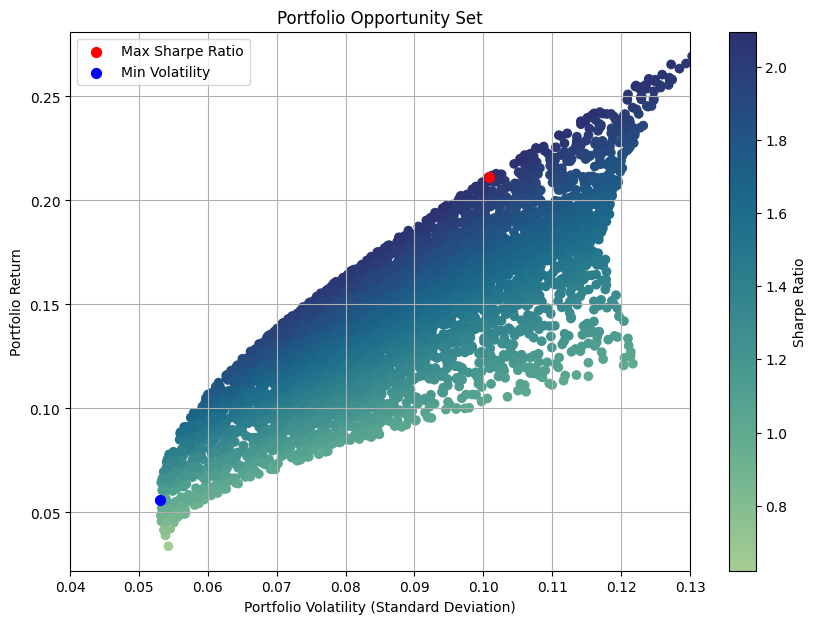

In [9]:
# Plot opportunity set
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='crest', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], color='red', label='Max Sharpe Ratio', s=50)
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], color='blue', label='Min Volatility', s=50)
plt.title('Portfolio Opportunity Set')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.xlim(xmin=0.04, xmax=0.13)
plt.grid(True)
plt.show()

**Code Breakdown:**
1. `plt.figure(figsize=(10, 7))`
	- Purpose: Sets up a plot with a custom figure size for better visibility.
2. Scatter Plot of All Portfolios
	- `plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='crest', marker='o')`:
    	- `results[1, :]`: Portfolio volatilities (standard deviations).
    	- `results[0, :]`: Portfolio returns.
    	- `c=results[2, :]`: Colors the points based on Sharpe ratios to indicate risk-adjusted performance.
    	- `cmap='crest'`: Sets the color map, where darker shades indicate higher Sharpe ratios.
    	- `marker='o'`: Uses circle markers for the scatter points.
	- This creates a scatter plot of all portfolios, representing their risk-return combinations.
3. Colorbar
	- `plt.colorbar(label='Sharpe Ratio')`: Adds a color bar to the plot to indicate the range of Sharpe ratios.
4. Highlighting the Optimal Portfolios
	- Maximum Sharpe Ratio Portfolio:
    	- `plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], color='red', label='Max Sharpe Ratio', s=50)`:
    	- Plots the portfolio with the highest Sharpe ratio as a red point for easy identification.
    	- `s=50`: Sets the size of the point to make it more prominent.
	- Minimum Volatility Portfolio:
    	- `plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], color='blue', label='Min Volatility', s=50)`:
    	- Plots the portfolio with the lowest volatility as a blue point.
5. Plot Labels and Title
	- `plt.title('Portfolio Opportunity Set')`: Sets the title of the chart.
	- `plt.xlabel('Portfolio Volatility (Standard Deviation)')`: Labels the x-axis, representing risk.
	- `plt.ylabel('Portfolio Return')`: Labels the y-axis, representing return.
6. Legend and Grid
	- `plt.legend()`: Adds a legend to distinguish the highlighted portfolios.
	- `plt.xlim(xmin=0.04, xmax=0.13)`: Sets the x-axis limits to focus on relevant volatility values.
	- `plt.grid(True)`: Adds a grid for easier interpretation of the data points.
7. `plt.show()`
	- Displays the completed chart.

---
#

---
# Display parameters of optimal portfolios

### Max Sharpe Ratio
This step extracts and displays the optimal weights of the assets for the maximum Sharpe ratio portfolio, which represents the portfolio that offers the best risk-adjusted return. Additionally, it prints the key performance metrics for this optimal portfolio, including the expected return, volatility, and Sharpe ratio.

The optimal weights help investors understand how to allocate capital among the different assets to achieve the best risk-adjusted return, while the performance metrics provide insights into how the portfolio is expected to perform in terms of return and risk.

In [10]:
# Get optimal weights
max_sharpe_weights = weights_record[max_sharpe_idx]
min_vol_weights = weights_record[min_vol_idx]

max_sharpe_portfolio = pd.DataFrame({
    'Ticker': mean_returns.index,
    'Weights': max_sharpe_weights
})
print('Optimal Weights for the Portfolio with Maximum Sharpe Ratio:')
max_sharpe_portfolio

Optimal Weights for the Portfolio with Maximum Sharpe Ratio:


,Ticker,Weights
0,FXNAX,0.258592
1,FZILX,0.000137
2,FZROX,0.741271


In [11]:
# Display parameters of max Sharpe ratio portfolio
print("Portfolio with Maximum Sharpe Ratio:")
print(f"Expected Return: {results[0, max_sharpe_idx]:.4f}")
print(f"Volatility (Standard Deviation): {results[1, max_sharpe_idx]:.4f}")
print(f"Sharpe Ratio: {results[2, max_sharpe_idx]:.4f}\n")

Portfolio with Maximum Sharpe Ratio:
Expected Return: 0.2112
Volatility (Standard Deviation): 0.1008
Sharpe Ratio: 2.0957



**Code Breakdown:**
1. Get Optimal Weights
	- `max_sharpe_weights = weights_record[max_sharpe_idx]`:
    	- Retrieves the asset allocation (weights) of the portfolio with the maximum Sharpe ratio from the weights_record list.
    	- `max_sharpe_idx` contains the index of the portfolio with the highest Sharpe ratio, so `weights_record[max_sharpe_idx]` gives the corresponding weights.
	- `min_vol_weights = weights_record[min_vol_idx]`:
    	- Retrieves the asset allocation (weights) of the portfolio with the minimum volatility using the same approach, but with `min_vol_idx`.
2. Create DataFrame for Maximum Sharpe Portfolio
	- `max_sharpe_portfolio = pd.DataFrame({'Ticker': mean_returns.index, 'Weights': max_sharpe_weights})`:
	- Creates a Pandas DataFrame to display the weights for the portfolio with the maximum Sharpe ratio.
	- The DataFrame has two columns:
    	- Ticker: The stock tickers (e.g., FZILX, FZROX, FXNAX).
    	- Weights: The corresponding allocation (weights) for each asset in the portfolio.
3. Print Optimal Weights
	- `print('Optimal Weights for the Portfolio with Maximum Sharpe Ratio:')`:
    	- Prints a message to indicate the optimal weights of the maximum Sharpe ratio portfolio.
	- `print(max_sharpe_portfolio)`:
    	- Displays the DataFrame containing the weights for each asset in the portfolio with the maximum Sharpe ratio.
4. Display Parameters of Optimal Portfolio
	- `print("Portfolio with Maximum Sharpe Ratio:")`:
    	- Prints the header for the portfolio’s performance metrics.
	- `print(f"Expected Return: {results[0, max_sharpe_idx]:.4f}")`:
    	- Displays the expected return for the portfolio with the maximum Sharpe ratio.
    	- `results[0, max_sharpe_idx]` accesses the expected return from the results array using the index of the maximum Sharpe ratio portfolio.
    	- The `.4f` format specifier ensures the return is printed with four decimal places.
	- `print(f"Volatility (Standard Deviation): {results[1, max_sharpe_idx]:.4f}")`:
    	- Displays the portfolio’s volatility (risk) in the same format.
	- `print(f"Sharpe Ratio: {results[2, max_sharpe_idx]:.4f}")`:
    	- Displays the Sharpe ratio of the portfolio with the maximum Sharpe ratio.
 

### Minimum Volatility
This part of the code is similar to the previous one, but it focuses on the portfolio with the minimum volatility rather than the maximum Sharpe ratio. The min_vol_portfolio DataFrame provides the optimal allocation of assets for the least risky portfolio, while the performance metrics display the expected return, volatility (risk), and Sharpe ratio.

The minimum volatility portfolio is ideal for investors who prioritize reducing risk over maximizing return. It provides the least volatile combination of assets, which might appeal to risk-averse investors seeking stability in their investments.

In [12]:
# Get Optimal Weights for Minimum Volatility Portfolio
min_vol_portfolio = pd.DataFrame({
    'Ticker': mean_returns.index,
    'Weights': min_vol_weights
})
print('Optimal Weights for the Portfolio with Minimum Volatility:')
min_vol_portfolio

Optimal Weights for the Portfolio with Minimum Volatility:


,Ticker,Weights
0,FXNAX,0.875740
1,FZILX,0.025498
2,FZROX,0.098761


In [28]:
# Display parameters of minimum volatility portfolio
print("Portfolio with Minimum Volatility:")
print(f"Expected Return: {results[0, min_vol_idx]:.4f}")
print(f"Volatility (Standard Deviation): {results[1, min_vol_idx]:.4f}")
print(f"Sharpe Ratio: {results[2, min_vol_idx]:.4f}\n")

Portfolio with Minimum Volatility:
Expected Return: 0.0558
Volatility (Standard Deviation): 0.0531
Sharpe Ratio: 1.0494



**Code Breakdown:**
1. Get Optimal Weights for Minimum Volatility Portfolio
	- `min_vol_portfolio = pd.DataFrame({'Ticker': mean_returns.index, 'Weights': min_vol_weights})`:
	- Similar to the previous step for the maximum Sharpe ratio portfolio, this line creates a Pandas DataFrame for the minimum volatility portfolio.
	- The `mean_returns.index` contains the tickers of the assets, and `min_vol_weights` contains the allocation (weights) of the assets in the minimum volatility portfolio.
	- This DataFrame will display the weights of the assets that comprise the portfolio with the least risk.
2. Print Optimal Weights
	- `print('Optimal Weights for the Portfolio with Minimum Volatility:')`:
    	- Prints a message to indicate the optimal weights of the minimum volatility portfolio.
	- `print(min_vol_portfolio):`
    	- Displays the DataFrame containing the weights for each asset in the minimum volatility portfolio.
3. Display Parameters of Minimum Volatility Portfolio
	- `print("Portfolio with Minimum Volatility:")`:
    	- Prints the header for the portfolio’s performance metrics.
	- `print(f"Expected Return: {results[0, min_vol_idx]:.4f}")`:
    	- Displays the expected return for the portfolio with the minimum volatility.
    	- `results[0, min_vol_idx]` accesses the expected return from the results array using the index of the minimum volatility portfolio.
    	- The `.4f` format specifier ensures the return is printed with four decimal places.
	- `print(f"Volatility (Standard Deviation): {results[1, min_vol_idx]:.4f}")`:
    	- Displays the portfolio’s volatility (risk) in the same format.
	- `print(f"Sharpe Ratio: {results[2, min_vol_idx]:.4f}")`:
    	- Displays the Sharpe ratio of the minimum volatility portfolio.


---
#

---
Note that the minimum volatility portfolio has a SD lower than that of each of the component asset's SD

In [14]:
# Display expected returns of component assets
mean_returns

Ticker
FXNAX    0.029126
FZILX    0.122489
FZROX    0.274673
dtype: float64

In [15]:
# Calculate the Standard Deviation of component assets
standard_deviation = daily_returns.std() * np.sqrt(252)
standard_deviation

Ticker
FXNAX    0.054978
FZILX    0.123297
FZROX    0.131825
dtype: float64

---
#

---
# Capital Allocation

---
# Specify Parameters
In this section we define key parameters. These parameters form the foundation for the subsequent calculations of the capital allocation line (CAL) and the investor’s optimal allocation between the risk-free asset and the risky portfolio.

1. Risk-Free Rate $(r_f)$:
    - We use the 10-year Treasury rate
2. Expected Return of Risky Portfolio $(E(r_P))$:
    - It uses the results array we obtained previously. The specific value is obtained using the index of the portfolio with the maximum Sharpe ratio (max_sharpe_idx). The round function limits the precision to four decimal places.
3. Standard Deviation of Risky Portfolio $(\sigma_P)$:
    - Similarly, the standard deviation (risk) of the optimal risky portfolio is extracted from the results array at the maximum Sharpe ratio index and rounded to four decimal places.
4. Risk Aversion Coefficient $(A)$:
    - This constant represents the investor’s level of risk aversion, where higher values indicate greater aversion to risk.

In [16]:
# Specify Parameters
r_f = .0466 # risk-free rate
E_R_P = round(results[0, max_sharpe_idx], 4)  # expected return of risky portfolio
sigma_P = round(results[1, max_sharpe_idx], 4) # standard deviation of risky portfolio
A = 22 # Risk Aversion Coefficient

#
---
# Define Function to Calculate Expected Return of Composite Portfolio 
This function calculates the Expected Return of a Composite Portfolio $(E(r_C))$ for a given level of risk $(\sigma_C)$, using the Capital Market Line (CML) formula:$$E(r_C) = r_f + \left( \frac{E(r_P) - r_f}{\sigma_P} \right) \cdot \sigma_C$$
Where:
- $r_f$: Risk-free rate of return.
- $E(r_P)$: Expected return of the risky portfolio.
- $\sigma_P$: Standard deviation of the risky portfolio (risk).
- $\sigma_C$: Standard deviation (risk) of the composite portfolio.
  
The Capital Market Line (CML) represents the risk-return relationship of a portfolio that combines a risk-free asset and the optimal risky portfolio.


In [17]:
def calculate_E_R_C(sigma_C):
    """
    This function calculates the Expected Return of a Composite Portfolio ( E(r_C) ) for a given level of risk (sigma_C), using the Capital Market Line (CML) formula.

    Input Variables:
	sigma_C: Input to the function, representing the risk (standard deviation) of the composite portfolio.    
    """
    E_R_C = r_f + ((E_R_P - r_f) / sigma_P) * sigma_C
    return E_R_C


**Code Breakdown:**
1. Input:
   - `sigma_C`: The risk (standard deviation) of the composite portfolio.
2. Calculation:
	- The CML formula calculates the expected return $E(r_C)$ based on the linear relationship between risk $(\sigma_C)$ and return. The slope of the line $(\frac{E(r_P) - r_f}{\sigma_P})$ represents the Sharpe Ratio of the risky portfolio.
3. Output:
	- The function returns `E_R_C`, the expected return of the composite portfolio for the given level of risk.

This function provides the building block for analyzing the performance of composite portfolios along the CML.

---
#

---
# Generating a Range of Risk $(\sigma_C)$ Values
In this step, we create an array of risk values $(\sigma_C)$ to represent the range of possible standard deviations for composite portfolios along the Capital Market Line (CML).

The array of $\sigma_C$ values will be used to calculate the corresponding expected returns $(E(r_C))$ for portfolios that combine the risk-free asset and the optimal risky portfolio.

In [18]:
# Generate a range of risk (sigma_C) values
sigma_C_values = np.linspace(0, sigma_P, 100)  

**Code Breakdown:**
- `np.linspace(0, sigma_P, 100)`:
- Generates 100 evenly spaced values between 0 and `sigma_P` (the standard deviation of the optimal risky portfolio).
- `0` represents a portfolio consisting entirely of the risk-free asset (zero risk).
- `sigma_P` represents a portfolio invested entirely in the risky portfolio (maximum risk).

- Output:
	- `sigma_C_values` is an array of 100 risk values ranging from no risk (0) to the maximum risk of the risky portfolio $(\sigma_P)$.
 
---
#

---
# Calculating Expected Returns $(E(R_C))$ for Composite Portfolios
This line calculates the various Expected Returns of the Composite Portfolio using our pre-defined function for the range of risk values $(\sigma_C)$ generated above.

In [19]:
# Calculate the corresponding expected returns (E(R_C))
E_R_C_values = calculate_E_R_C(sigma_C_values)

**Code Breakdown:**
1. Function Call:
	- The previously defined function `calculate_E_R_C(sigma_C)` is applied to the array `sigma_C_values`, which represents different levels of portfolio risk.
2. Calculation:
	- For each value of $\sigma_C$ in `sigma_C_values`, the function computes the corresponding expected return $(E(R_C))$ using the CML formula: $$E(R_C) = r_f + \frac{E(R_P) - r_f}{\sigma_P} \cdot \sigma_C$$
	- This results in an array of $E(R_C)$ values that represent the expected returns for each level of risk along the CML.
3. Output:
	- `E_R_C_values`: An array containing the expected return values corresponding to the risk levels in `sigma_C_values`.

Significance: 
- These $E(R_C)$ values will form the y-axis when plotting the Capital Market Line (CML), illustrating the risk-return trade-off for composite portfolios.

---
#

---
# Calculate the Optimal Allocation to the Risky Portfolio $(y)$
In this step, we determine the proportion of an investor’s capital $(y)$ that should be allocated to the risky portfolio to maximize utility, given the investor’s risk tolerance.

The formula used is: $$y = \frac{E[R_P] - r_f}{A \cdot \sigma_P^2}$$

Where:
- $E(R_P)$: Expected return of the risky portfolio.
- $r_f$: Risk-free rate of return.
- $A$: Investor’s risk aversion coefficient (higher A indicates more risk-averse behavior).
- $\sigma_P^2$: Variance of the risky portfolio.


In [20]:
# Calculate the Optimal Allocation to the Risky Portfolio
y = (E_R_P - r_f)/(A*(sigma_P**2))

**Code Breakdown:**
1. Risk Premium:
	- `(E(R_P) - r_f)`: The excess return of the risky portfolio over the risk-free rate.
	- This measures the reward for taking on the risk of investing in the risky portfolio.
2. Risk Aversion and Variance:
	- `(A*(sigma_P**2))`: Represents the penalty for taking on additional risk. Higher risk aversion $(A)$ or portfolio variance $(\sigma_P^2)$ decreases the allocation to the risky portfolio.
3. Optimal Allocation $(y)$:
	- The result of the formula gives the optimal proportion of the investor’s capital to allocate to the risky portfolio, where $0 \leq y \leq 1$.
	- If $y > 1$, it implies leveraging (borrowing funds to invest more than 100% in the risky portfolio).

Significance:

- This calculation determines the risk-return balance for the investor:
	- A risk-averse investor ($A$ is high) will allocate less to the risky portfolio.
	- A risk-tolerant investor ($A$ is low) will allocate more to the risky portfolio.

---
#

---
# Calculate the Maximum Utility 
In this step, we calculate the maximum utility that an investor can achieve by allocating the optimal proportion (y) to the risky portfolio. Utility is a measure of the satisfaction or benefit derived from wealth, and it helps in determining the optimal investment choice.

The formula used is: $$U_{\text{max}} = r_f + y \cdot [E(r_P) - r_f] - {1\over 2} \cdot A \cdot y^2 \cdot \sigma_P^2$$

Where:
- $r_f=$ Risk-free rate of return.
- $y=$ Optimal allocation to the risky portfolio, previously calculated.
- $E(r_P)=$ Expected return of the risky portfolio.
- $A=$ Investor’s risk aversion coefficient.
- $\sigma_P^2=$ Variance of the risky portfolio.

In [21]:
Max_U = r_f + y*(E_R_P - r_f) - .5 * A * (y**2) * (sigma_P**2)

**Code Breakdown:**
1. First Term `r_f`:
    - This represents the return from the risk-free asset.
2. Second Term `y*(E_R_P - r_f)`:
	- This is the return from the risky portfolio. The investor allocates $y$ proportion to the risky portfolio, and the term $[E(r_P) - r_f]$ is the risk premium (the return above the risk-free rate).
3. Third Term `- .5 * A * (y**2) * (sigma_P**2)`:
	- This represents the penalty for risk. The investor incurs a cost for taking on risk, which is quadratic in the amount allocated to the risky portfolio. This cost increases with the level of risk $(y^2 \cdot \sigma_P^2)$ and the investor’s risk aversion $(A)$.

Significance
- The maximum utility $(U_{\text{max}})$ is the highest level of satisfaction or wealth that the investor can achieve given their risk tolerance and the return characteristics of the available assets.
- The formula balances the investor’s desire for higher returns with their aversion to risk, ensuring that the optimal allocation maximizes their utility.

---
#

---
# Generating Risk and Expected Return for the Indifference Curve
In this step, we generate a range of risk values $(\sigma)$ and calculate the corresponding expected returns $(E(r))$ to plot the indifference curve for the optimal portfolio.

**Purpose:**
- The resulting array `E_r` represents the expected returns for a set of portfolio risks along the indifference curve.
- An indifference curve shows combinations of expected return and risk that provide the investor with the same level of utility. By plotting this curve, we can visualize how risk and return interact for the investor given their risk aversion.

In [23]:
sigma_range = np.linspace(0, 0.12, 500)  # Standard deviation (risk)

# Calculate E(r) for the given utility and risk aversion
E_r = Max_U + 0.5 * A * sigma_range**2

**Code Breakdown:**
1. Generating the Range of Risk Values $(\sigma)$:
	- `sigma_range = np.linspace(0, 0.12, 500)`
	- This generates an array of 500 equally spaced risk values between 0 and 0.12 (12%). This range represents various levels of portfolio risk that an investor might consider, from no risk (0%) to relatively high risk (12%).
2. Calculating Corresponding Expected Returns $(E(r))$:
	- `E_r = Max_U + 0.5 * A * sigma_range**2`
	- This formula calculates the expected return for each risk value along the indifference curve.

---
#

---
# Calculating and Displaying the Optimal Portfolio Parameters
In this section, the code calculates the optimal parameters for the composite portfolio, including the allocation to the risky asset, the risk-free asset, and the expected return and standard deviation of the composite portfolio. Then, it prints out the results for the user.

We calculate the Standard Deviation of the Optimal Portfolio using the function $\sigma_C=y\sigma_P$

We calculate the expected return of the optimal portfolio using our pre-defined function (calculate_E_R_C) using the standard deviation of the optimal portfolio we calculated above as the input.

In [24]:
SD_C = y * sigma_P

In [25]:
Optimal_E_R_C = calculate_E_R_C(SD_C)

In [26]:
print("Optimal Portfolio Parameters:")
print(f"Optimal Allocation to Risky Portfolio = {y:.2f}")
print(f"Optimal Allocation to Risk-Free Asset = {1-y:.2f}")
print(f"Expected Return of Composite Portfolio = {Optimal_E_R_C:.2f}")
print(f"Standard Deviation of Composite Portfolio = {SD_C:.2f}")

Optimal Portfolio Parameters:
Optimal Allocation to Risky Portfolio = 0.74
Optimal Allocation to Risk-Free Asset = 0.26
Expected Return of Composite Portfolio = 0.17
Standard Deviation of Composite Portfolio = 0.07


**Code Breakdown:**
1. Calculate the Standard Deviation of the Composite Portfolio (SD_C):
	- `SD_C = y * sigma_P`
	- The standard deviation of the composite portfolio is calculated by multiplying the optimal allocation to the risky portfolio $(y)$ by the standard deviation of the risky portfolio $(\sigma_P)$.
	- This reflects the level of risk associated with the composite portfolio, which combines the risk-free asset and the risky portfolio in the proportion $y$.
2. Calculate the Expected Return of the Composite Portfolio $(E(r_C))$:
	- `Optimal_E_R_C = calculate_E_R_C(SD_C)`
	- Using the previously defined function `calculate_E_R_C(sigma_C)`, the expected return of the composite portfolio is computed for the calculated risk (SD_C).
3. Printing the Results:
	- The results are displayed with formatted print statements that show the optimal portfolio parameters:
	- Optimal Allocation to Risky Portfolio $(y)$: The proportion of the portfolio allocated to the risky asset.
	- Optimal Allocation to Risk-Free Asset $(1-y)$: The remaining portion of the portfolio allocated to the risk-free asset.
	- Expected Return of Composite Portfolio $(E(r_C))$: The expected return for the composite portfolio based on the optimal allocation.
	- Standard Deviation of Composite Portfolio $(\sigma_C)$: The overall risk of the composite portfolio.

---
#

---
# Plot the Capital Allocation Line (CAL) and Utility Indifference Curve
This section visualizes the relationship between risk and return for the investor’s portfolio using the Capital Allocation Line (CAL) and Utility Indifference Curve, and marks key portfolio points for better understanding.

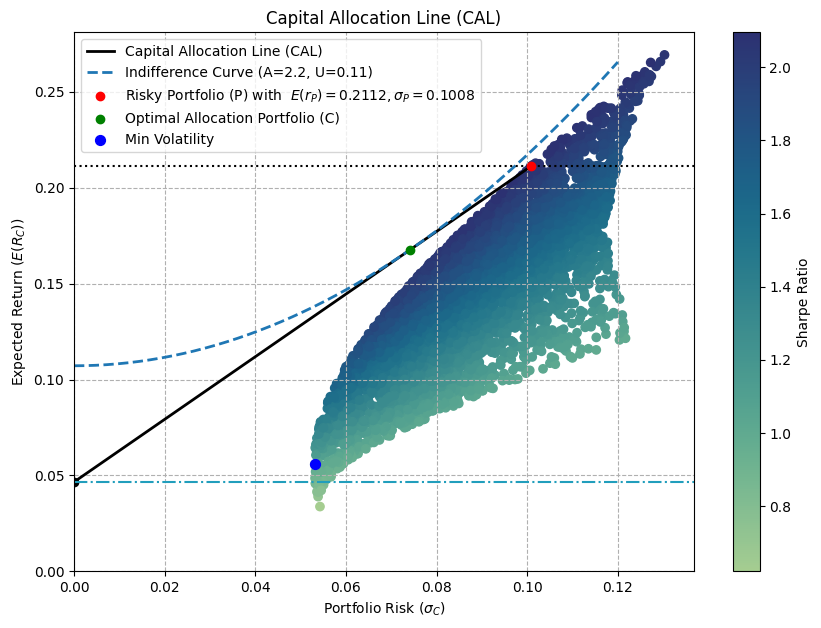

In [27]:
# Plot the Capital Allocation Line
# Re-plotting the CAL with the y-axis starting at 0
plt.figure(figsize=(10, 7))
plt.plot(sigma_C_values, E_R_C_values, lw=2, label='Capital Allocation Line (CAL)', color='black') # Capital Allocation Line
plt.plot(sigma_range, E_r, linestyle='--', linewidth=2, label=f"Indifference Curve (A={A/10}, U={Max_U:.2f})") # Utility Indifference Curve
plt.scatter(sigma_P, E_R_P, color='red', # Marker for Risky Portfolio
            label=f"Risky Portfolio (P) with  $E(r_P)={E_R_P}, \\sigma_P={sigma_P}$", 
            zorder=5) 
plt.scatter(SD_C, Optimal_E_R_C, color='green', label='Optimal Allocation Portfolio (C)', zorder=5) # Marker for Optimal Allocation
plt.scatter(0, r_f, color='black')
plt.axhline(y=r_f, color='#219ebc', linestyle='-.') #, label='Risk-Free Rate ($R_f$)') ; xmin=0, xmax=.1,
plt.axhline(y=E_R_P, color='black', linestyle='dotted') #, label='Expected Return of P ($E(R_P)$)'); xmin=0, xmax=sigma_P/.5,
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='crest', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], color='blue', label='Min Volatility', s=50)


# Annotating the graph
plt.title("Capital Allocation Line (CAL)")
plt.xlabel(r"Portfolio Risk ($\sigma_C$)")
plt.ylabel("Expected Return ($E(R_C)$)")
plt.ylim(0, ) 
plt.xlim(0, )
plt.legend()
plt.grid(linestyle='--')

# Show the plot
plt.show()

**Code Breakdown:**
1. Plotting the Capital Allocation Line (CAL):
	- `plt.plot(sigma_C_values, E_R_C_values, lw=2, label='Capital Allocation Line (CAL)', color='black')`
	- The Capital Allocation Line (CAL) is plotted using the `sigma_C_values` (the risk values) and `E_R_C_values` (the expected returns for each risk level). The line represents the trade-off between risk and return for portfolios that combine the risk-free asset and the risky portfolio.
2. Plotting the Utility Indifference Curve:
	- `plt.plot(sigma_range, E_r, linestyle='--', linewidth=2, label=f"Indifference Curve (A={A/10}, U={Max_U:.2f})")`
	- The indifference curve is plotted as a dashed line. This curve represents the combinations of risk and return that give the investor the same level of utility, considering their risk aversion $A$ and the maximum utility $(U_{\text{max}})$.
3. Marking Key Points:
	- Risky Portfolio $(P)$:
    	- `plt.scatter(sigma_P, E_R_P, color='red', label=f"Risky Portfolio (P) with $E(r_P)={E_R_P}, \\sigma_P={sigma_P}$")`
    	- The red point marks the risky portfolio $(P)$, showing its expected return and risk (standard deviation).
	- Optimal Portfolio $(C)$:
    	- `plt.scatter(SD_C, Optimal_E_R_C, color='green', label='Optimal Allocation Portfolio (C)')`
    	- The green point marks the optimal portfolio $(C)$, indicating the portfolio that combines the risk-free asset and the risky portfolio for maximum utility.
	- Risk-Free Asset:
    	- `plt.scatter(0, r_f, color='black')`
    	- A black dot marks the risk-free asset (with zero risk and the risk-free rate of return).
	- Additional Markers:
    	- Sharpe Ratio Color Map:
    	- `plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='crest', marker='o')`
    	- This adds a color-coded scatter plot showing different portfolio points based on their Sharpe ratio.
    	- Min Volatility Portfolio:
    	- `plt.scatter(results[1, min_vol_idx], results[0, min_vol_idx], color='blue', label='Min Volatility', s=50)`
    	- A blue dot marks the minimum volatility portfolio, which has the lowest risk among all possible portfolios.
4. Horizontal and Vertical Lines:
	- `plt.axhline(y=r_f, color='#219ebc', linestyle='-.')`
	- A dashed line represents the risk-free rate (horizontal line).
	- `plt.axhline(y=E_R_P, color='black', linestyle='dotted')`
	- A dotted line represents the expected return of the risky portfolio (P).
5. Plot Formatting:
	- The graph is labeled with a title, axis labels, and a grid to make it easier to interpret.
	- The legend differentiates each plotted element for clarity.
	- The `plt.xlim(0, )` and `plt.ylim(0, )` functions adjust the plot’s axes, ensuring a clear and informative display.

Purpose:
- This plot provides a visual representation of how the optimal portfolio $(C)$ compares to other portfolios along the Capital Allocation Line (CAL).
- It also shows the indifference curve, marking the trade-offs the investor faces in terms of risk and expected return.
- The plot highlights key portfolios like the risky portfolio $(P)$, minimum volatility portfolio, and optimal portfolio $(C)$ to guide decision-making based on the investor’s preferences and risk tolerance.